In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.special import hyp1f1, erf, gamma

# Plotting final $P(n_i)$

In [2]:
def read_all_fields_hist(filename):
    fin = open(filename, "r")
    lines = fin.readlines()
    fin.close()

    avn_hist = []
    niters = []
    for line in lines[1:]:
        parts = line.split()
        niters.append(int(parts[0]))
        avn_hist.append([float(x) for x in parts[1:]])

    avn_hist = np.array(avn_hist)
    return niters, avn_hist

In [3]:
def get_average_distribution(fields, nvals, beta):
    av_dist = []
    normalizations = []
    for field in fields:
        normalization = np.sqrt(np.pi / beta / 2) * (1 + erf(field * np.sqrt(beta / 2)))
        normalizations.append(normalization)
    for n in nvals:
        av_p = 0
        for i in range(len(fields)):
            field = fields[i]
            normalization = normalizations[i]
            av_p += np.exp(-0.5 * beta * (n - field) ** 2) / normalization
        av_p /= len(fields)
        av_dist.append(av_p)
    return np.array(av_dist)

In [4]:
def get_average_distribution_full(fields, nvals, beta, lda):
    av_dist = []
    normalizations = []
    for field in fields:
        normalization = 2 ** (beta * lda - 3) / 2 * beta ** (- beta * lda / 2) * \
                        (np.sqrt(2) * gamma(beta * lda / 2) * hyp1f1((1 - beta * lda) / 2, 0.5, -beta * field ** 2 / 2) + 
                         2 * field * np.sqrt(beta) * gamma((1 + beta * lda) / 2) * hyp1f1(1 - beta * lda / 2, 1.5, -beta * field ** 2 / 2))
        normalizations.append(normalization)
    for n in nvals:
        av_p = 0
        for i in range(len(fields)):
            field = fields[i]
            normalization = normalizations[i]
            av_p += n ** (beta * lda - 1) * np.exp(-0.5 * beta * (n - field) ** 2) / normalization
        av_p /= len(fields)
        av_dist.append(av_p)
    return np.array(av_dist)

In [5]:
def plot_av_dist(nvals, av_dist_list, labels, figname, eps, mu, sigma):
    plt.figure()
    for i in range(len(av_dist_list)):
        av_dist = av_dist_list[i]
        plt.plot(nvals, av_dist, label=labels[i])
    plt.xlabel('n')
    plt.ylabel(r'$\hat{P}(n)$')
    plt.title(r'$\epsilon=$' + str(eps) + r'  $\mu=$' + str(mu) + r'  $\sigma=$' + str(sigma), fontsize=12)
    plt.legend(loc='best')
    plt.savefig(figname)
    plt.close()

In [6]:
def plot_av_dist_log(nvals, av_dist_list, labels, figname, eps, mu, sigma):
    plt.figure()
    for i in range(len(av_dist_list)):
        av_dist = av_dist_list[i]
        plt.plot(nvals, av_dist, label=labels[i])
    plt.xlabel('n')
    plt.ylabel(r'$\hat{P}(n)$')
    plt.yscale('log')
    plt.title(r'$\epsilon=$' + str(eps) + r'  $\mu=$' + str(mu) + r'  $\sigma=$' + str(sigma), fontsize=12)
    plt.legend(loc='best')
    plt.savefig(figname)
    plt.close()

In [7]:
def build_params_from_sched(sched):
    params = []
    for eps in sched['eps']:
        for mu in sched['mu']:
            for sigma in sched['sigma']:
                params.append((eps, mu, sigma))
    return params

In [8]:
def plot_sched_final(nvals, sched, path_to_data, path_to_fig, T, lda, av0, tol, maxiter, print_every, seed0, seedf):
    beta = 1.0 / T
    params_list = build_params_from_sched(sched)
    for eps, mu, sigma in params_list:
        dist_list = []
        labels = []
        for seed in range(seed0, seedf + 1):
            filedata = f'IBMF_Lotka_Volterra_avn_hist_gr_inside_RRG_T_{"{0:.3f}".format(T)}_lambda_{"{0:.3f}".format(lda)}_av0_{"{0:.3f}".format(av0)}_tol_{tol}_maxiter_{maxiter}_eps_{"{0:.3f}".format(eps)}_mu_{"{0:.3f}".format(mu)}_sigma_{"{0:.3f}".format(sigma)}_print_every_{print_every}_seed_{seed}.txt'
            _, fields_hist = read_all_fields_hist(path_to_data + "/" + filedata)
            fields_list = fields_hist[-1]
            av_dist = get_average_distribution(fields_list, nvals, beta)
            dist_list.append(av_dist)
            labels.append(f'seed={seed}')
        figname = f'IBMF_LV_av_dist_T_{"{0:.3f}".format(T)}_lambda_{"{0:.3f}".format(lda)}_av0_{"{0:.3f}".format(av0)}_tol_{tol}_maxiter_{maxiter}_eps_{"{0:.3f}".format(eps)}_mu_{"{0:.3f}".format(mu)}_sigma_{"{0:.3f}".format(sigma)}.png' 
        figout = path_to_fig + "/" + figname
        plot_av_dist_log(nvals, dist_list, labels, figout, eps, mu, sigma)

In [9]:
def plot_sched_final_fulldist(nvals, sched, path_to_data, path_to_fig, T, lda, av0, tol, maxiter, print_every, seed0, seedf):
    beta = 1.0 / T
    params_list = build_params_from_sched(sched)
    for eps, mu, sigma in params_list:
        dist_list = []
        labels = []
        for seed in range(seed0, seedf + 1):
            filedata = f'IBMF_Lotka_Volterra_avn_hist_gr_inside_RRG_T_{"{0:.3f}".format(T)}_lambda_{"{0:.3f}".format(lda)}_av0_{"{0:.3f}".format(av0)}_tol_{tol}_maxiter_{maxiter}_eps_{"{0:.3f}".format(eps)}_mu_{"{0:.3f}".format(mu)}_sigma_{"{0:.3f}".format(sigma)}_print_every_{print_every}_seed_{seed}.txt'
            _, fields_hist = read_all_fields_hist(path_to_data + "/" + filedata)
            fields_list = fields_hist[-1]
            av_dist = get_average_distribution_full(fields_list, nvals, beta, lda)
            dist_list.append(av_dist)
            labels.append(f'seed={seed}')
        figname = f'IBMF_LV_av_dist_full_T_{"{0:.3f}".format(T)}_lambda_{"{0:.3f}".format(lda)}_av0_{"{0:.3f}".format(av0)}_tol_{tol}_maxiter_{maxiter}_eps_{"{0:.3f}".format(eps)}_mu_{"{0:.3f}".format(mu)}_sigma_{"{0:.3f}".format(sigma)}.png' 
        figout = path_to_fig + "/" + figname
        plot_av_dist_log(nvals, dist_list, labels, figout, eps, mu, sigma)

In [10]:
path_to_graph = '/media/david/Data/UH/Grupo_de_investigacion/Ecology/Graphs/For_IBMF'
path_to_data = '/media/david/Data/UH/Grupo_de_investigacion/Ecology/Results/IBMF/AllData/Printall/nsamples_10'
path_to_fig = '/media/david/Data/UH/Grupo_de_investigacion/Ecology/Results/IBMF/Distribution_Figures'

T = 0.50
lda = 0.01
av0 = 0.9
tol = "1.0e-04"
maxiter = "1000"
print_every = "1"
N = "1000"
c = "3"

n0 = 0.001
nf = 5
dn = 0.01
nvals = np.arange(n0, nf, dn)

In [11]:
sched_1 = {"eps":[0.0], "mu":[0.0], "sigma":[0.28, 0.35, 0.45]}
sched_2 = {"eps":[1.0], "mu":[0.0], "sigma":[0.05, 0.17, 0.23, 0.30]}
sched_3 = {"eps":[1.0], "mu":[0.1], "sigma":[0.05, 0.18, 0.25, 0.35]}
seed0 = 1
seedf = 10
scheds = [sched_1, sched_2, sched_3]

In [25]:
for sched in scheds:
    plot_sched_final(nvals, sched, path_to_data, path_to_fig, T, lda, av0, tol, maxiter, print_every, seed0, seedf)

/tmp/ipykernel_37651/833442049.py:12: RuntimeWarning: invalid value encountered in scalar divide
  av_p += np.exp(-0.5 * beta * (n - field) ** 2) / normalization
/tmp/ipykernel_37651/833442049.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  av_p += np.exp(-0.5 * beta * (n - field) ** 2) / normalization


In [26]:
for sched in scheds:
    plot_sched_final_fulldist(nvals, sched, path_to_data, path_to_fig, T, lda, av0, tol, maxiter, print_every, seed0, seedf)

# Identifying non-convergent cycles

In [12]:
def read_graph(filegraph):
    fgraph = open(filegraph, 'r')
    graph = nx.DiGraph()
    while True:
        v = fgraph.readline()
        if not v:
            break
        line = v.split()
        i = int(line[0])
        nneigh = int(line[1])
        for _ in range(nneigh):
            line = fgraph.readline().split()
            j = int(line[1])
            aji = float(line[2])
            graph.add_edge(i, j, weight=aji)
    fgraph.close()
    return graph

In [13]:
def identify(avn_hist, tol_var=1e-3):
    nit, N = avn_hist.shape
    vars = np.zeros((nit - 1, N))
    for i in range(nit - 1):
        vars[i, :] = avn_hist[i + 1, :] - avn_hist[i, :]
    streaks = np.zeros(N, dtype=int)
    converged = []
    bistable = []
    noisy = []
    for i in range(N):
        if np.abs(vars[-1, i]) < tol_var and np.abs(vars[-2, i]) < tol_var:
            converged.append(i)
            cond = True
            while cond and streaks[i] < nit - 1:
                if np.abs(vars[-1 - streaks[i], i]) < tol_var:
                    streaks[i] += 1
                else:
                    cond = False
        elif vars[-1, i] * vars[-2, i] < 0 and np.abs(vars[-1, i] + vars[-2, i]) < tol_var:
            bistable.append(i)
            cond = True
            while cond and streaks[i] < nit - 2:
                if vars[-1 - streaks[i], i] * vars[-2 - streaks[i], i] < 0 and np.abs(vars[-1 - streaks[i], i] + vars[-2 - streaks[i], i]) < tol_var:
                    streaks[i] += 1
                else:
                    cond = False
        else:
            noisy.append(i)
    return converged, bistable, noisy, streaks

In [14]:
def identify_all(scheds, path_to_data, path_to_out, T, lda, av0, tol, maxiter, print_every, seed0, seedf):
    fileout = path_to_out + "/" + f'IBMF_LV_identify_conv_T_{"{0:.3f}".format(T)}_lambda_{"{0:.3f}".format(lda)}_av0_{"{0:.3f}".format(av0)}_tol_{tol}_maxiter_{maxiter}.txt'
    filestreak = path_to_out + "/" + f'IBMF_LV_streaks_T_{"{0:.3f}".format(T)}_lambda_{"{0:.3f}".format(lda)}_av0_{"{0:.3f}".format(av0)}_tol_{tol}_maxiter_{maxiter}.txt'
    fo = open(fileout, "w")
    fs = open(filestreak, "w")
    fo.write("# eps mu sigma seed N converged bistable noisy\n")
    fs.write("# eps mu sigma seed N streaks\n")
    all_converged = {}
    all_bistable = {}
    all_noisy = {}
    for sched in scheds:
        params_list = build_params_from_sched(sched)
        for eps, mu, sigma in params_list:
            for seed in range(seed0, seedf + 1):
                filedata = f'IBMF_Lotka_Volterra_avn_hist_gr_inside_RRG_T_{"{0:.3f}".format(T)}_lambda_{"{0:.3f}".format(lda)}_av0_{"{0:.3f}".format(av0)}_tol_{tol}_maxiter_{maxiter}_eps_{"{0:.3f}".format(eps)}_mu_{"{0:.3f}".format(mu)}_sigma_{"{0:.3f}".format(sigma)}_print_every_{print_every}_seed_{seed}.txt'
                _, fields_hist = read_all_fields_hist(path_to_data + "/" + filedata)
                converged, bistable, noisy, streaks = identify(fields_hist)
                fo.write(f'{eps} {mu} {sigma} {seed} {len(streaks)} {len(converged)} {len(bistable)} {len(noisy)}\n')
                all_converged[(eps, mu, sigma, seed)] = converged
                all_bistable[(eps, mu, sigma, seed)] = bistable
                all_noisy[(eps, mu, sigma, seed)] = noisy
                fs.write(f'{eps} {mu} {sigma} {seed} {len(streaks)}')
                for i in range(len(streaks)):
                    fs.write(f' {streaks[i]}')
                fs.write('\n')
    fo.close()
    fs.close()
    return all_converged, all_bistable, all_noisy

In [15]:
def plot_in_graph(graph, bistable, noisy, figname, eps, mu, sigma, seed):
    plt.figure()
    pos = nx.spring_layout(graph)
    subgraph_both = graph.subgraph(bistable + noisy)
    subgraph_bistable = graph.subgraph(bistable)
    subgraph_noisy = graph.subgraph(noisy)
    nx.draw(subgraph_both, pos=pos, node_size=50, node_color='gray', edge_color='purple', alpha=0.5)
    nx.draw(subgraph_bistable, pos=pos, node_size=50, node_color='blue', edge_color='blue', alpha=0.5)
    nx.draw(subgraph_noisy, pos=pos, node_size=50, node_color='red', edge_color='red', alpha=0.5)
    plt.title(f'eps={eps} mu={mu} sigma={sigma} seed={seed}', fontsize=12)
    plt.savefig(figname)
    plt.close()

In [16]:
def plot_nonconvergent_in_graphs(all_bistable, all_noisy, scheds, path_to_graph, path_to_plots, T, lda, av0, tol, maxiter, print_every, N, c, seed0, seedf):
    for sched in scheds:
        params_list = build_params_from_sched(sched)
        for eps, mu, sigma in params_list:
            for seed in range(seed0, seedf + 1):
                if len(all_bistable[(eps, mu, sigma, seed)]) + len(all_noisy[(eps, mu, sigma, seed)]) > 0:
                    graphname = f'LV_Graph_for_IBMF_N_{N}_c_{c}_eps_{"{0:.3f}".format(eps)}_mu_{"{0:.3f}".format(mu)}_sigma_{"{0:.3f}".format(sigma)}_seed_{seed}.txt'
                    graph = read_graph(path_to_graph + "/" + graphname)
                    figname = path_to_plots + "/" + f'IBMF_LV_plotingraph_T_{"{0:.3f}".format(T)}_lambda_{"{0:.3f}".format(lda)}_av0_{"{0:.3f}".format(av0)}_tol_{tol}_maxiter_{maxiter}_eps_{"{0:.3f}".format(eps)}_mu_{"{0:.3f}".format(mu)}_sigma_{"{0:.3f}".format(sigma)}_print_every_{print_every}_seed_{seed}.png'
                    plot_in_graph(graph, all_bistable[(eps, mu, sigma, seed)], all_noisy[(eps, mu, sigma, seed)], figname, eps, mu, sigma, seed)

In [24]:
def plot_bars(all_converged, all_bistable, all_noisy, path_to_out, T, lda, av0, tol, maxiter, print_every, eps, mu, sigma):
    figout = path_to_out + "/" + f'IBMF_LV_identify_conv_bars_T_{"{0:.3f}".format(T)}_lambda_{"{0:.3f}".format(lda)}_av0_{"{0:.3f}".format(av0)}_tol_{tol}_maxiter_{maxiter}_eps_{"{0:.3f}".format(eps)}_mu_{"{0:.3f}".format(mu)}_sigma_{"{0:.3f}".format(sigma)}_print_every_{print_every}.png'
    plt.figure()
    converged = all_converged[(eps, mu, sigma, seed0)]
    bistable = all_bistable[(eps, mu, sigma, seed0)]
    noisy = all_noisy[(eps, mu, sigma, seed0)]        
    plt.bar(seed0, len(converged), label=f'converged', color='green')
    plt.bar(seed0, len(bistable), bottom=len(converged), label=f'bistable', color='blue')
    plt.bar(seed0, len(noisy), bottom=len(converged) + len(bistable), label=f'noisy', color='red')
    for seed in range(seed0 + 1, seedf + 1):
        converged = all_converged[(eps, mu, sigma, seed)]
        bistable = all_bistable[(eps, mu, sigma, seed)]
        noisy = all_noisy[(eps, mu, sigma, seed)]        
        plt.bar(seed, len(converged), color='green')
        plt.bar(seed, len(bistable), bottom=len(converged), color='blue')
        plt.bar(seed, len(noisy), bottom=len(converged) + len(bistable), color='red')
        
    plt.xlabel('seed')
    plt.ylabel('Number of nodes')
    plt.title('IBMF    ' + r'$\epsilon=$' + str(eps) + r'  $\mu=$' + str(mu) + r'  $\sigma=$' + str(sigma), fontsize=12)
    plt.legend(loc='best')
    plt.savefig(figout)

In [18]:
path_to_out = '/media/david/Data/UH/Grupo_de_investigacion/Ecology/Results/IBMF/Identifying_Convergence'

In [19]:
all_converged, all_bistable, all_noisy = identify_all(scheds, path_to_data, path_to_out, T, lda, av0, tol, maxiter, print_every, seed0, seedf)

/tmp/ipykernel_6200/838947265.py:19: RuntimeWarning: invalid value encountered in scalar multiply
  elif vars[-1, i] * vars[-2, i] < 0 and np.abs(vars[-1, i] + vars[-2, i]) < tol_var:


In [41]:
plot_nonconvergent_in_graphs(all_bistable, all_noisy, scheds, path_to_graph, path_to_out, T, lda, av0, tol, maxiter, print_every, N, c, seed0, seedf)

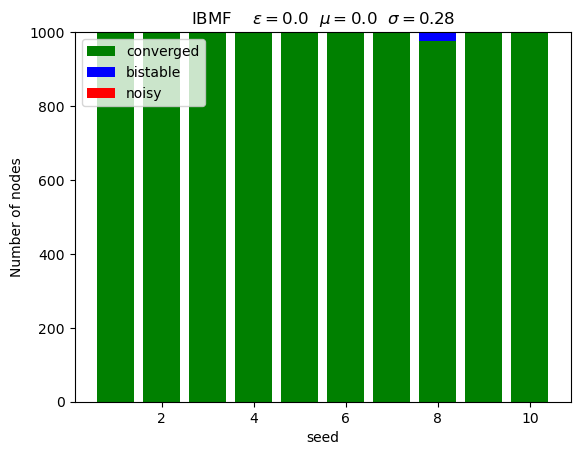

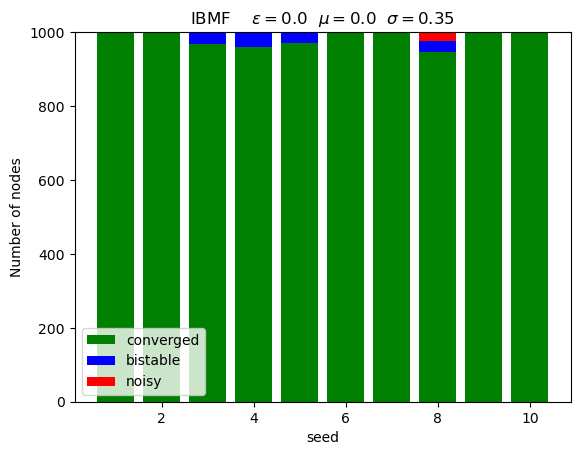

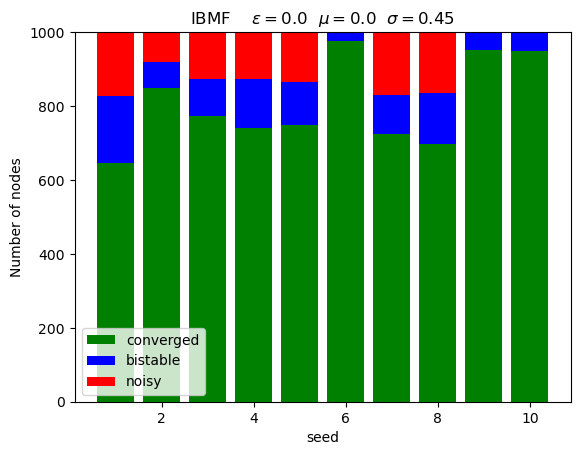

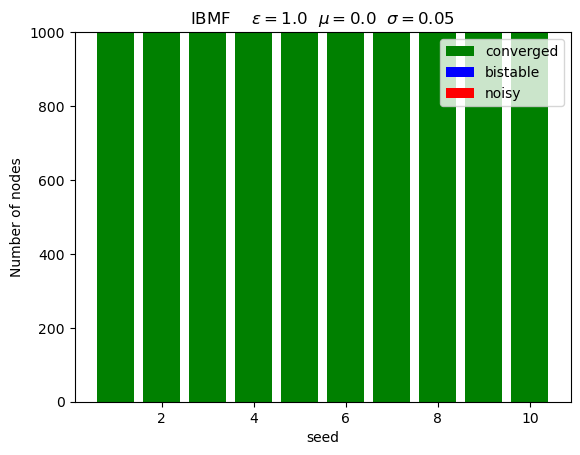

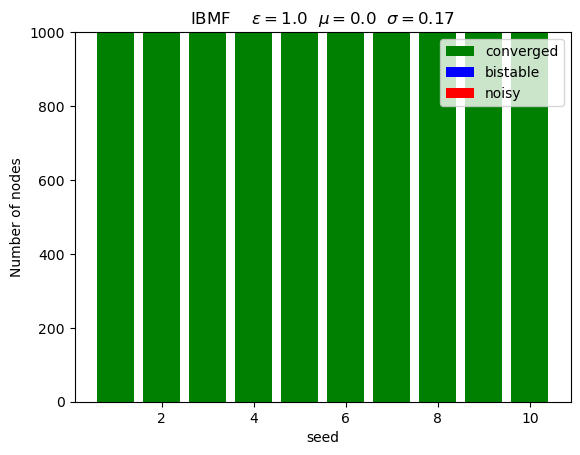

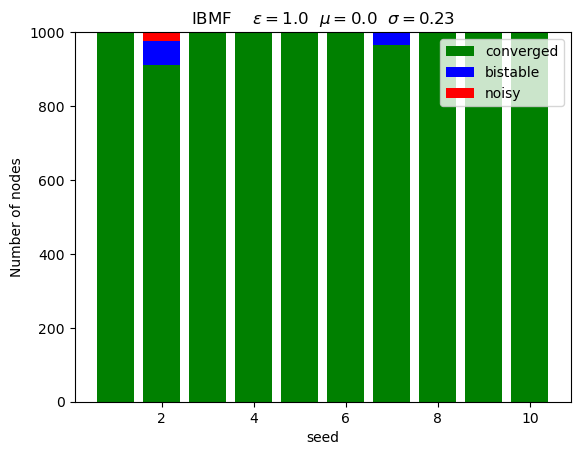

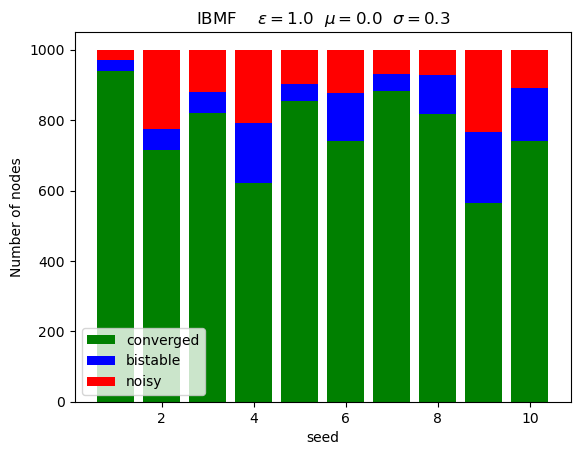

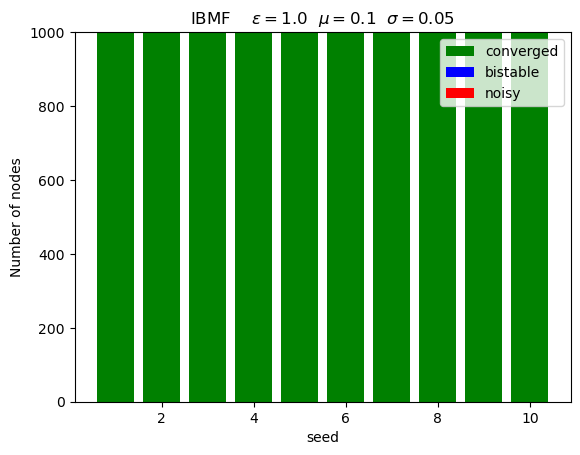

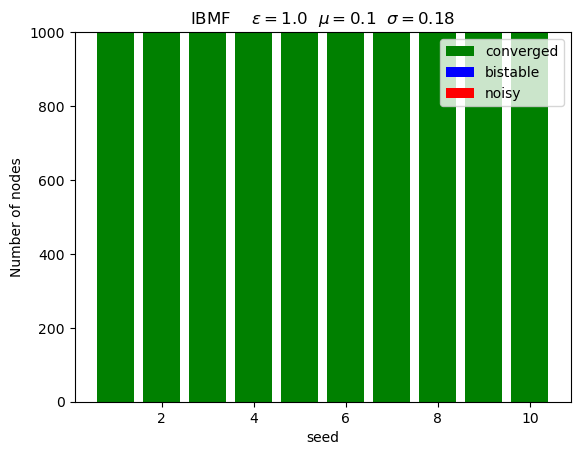

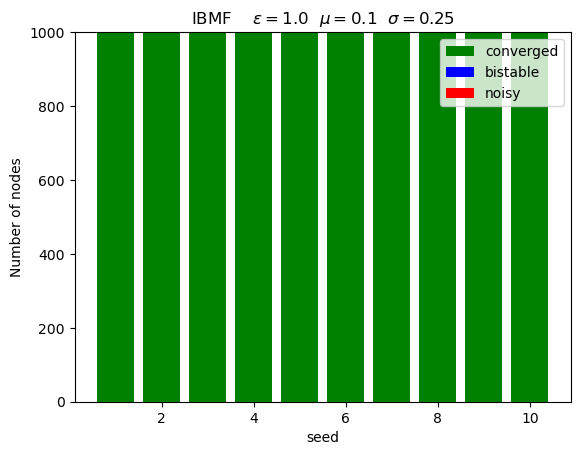

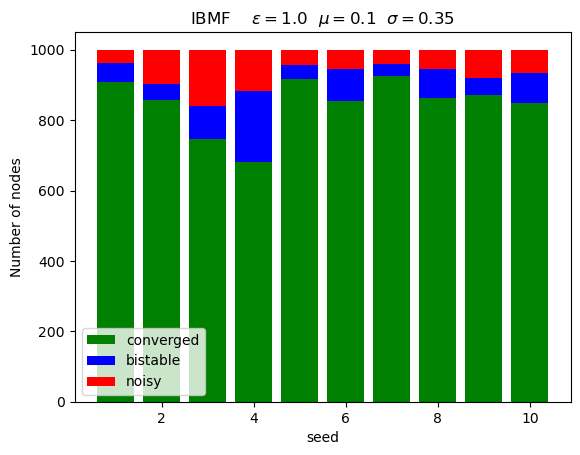

In [25]:
for sched in scheds:
        params_list = build_params_from_sched(sched)
        for eps, mu, sigma in params_list:
            plot_bars(all_converged, all_bistable, all_noisy, path_to_out, T, lda, av0, tol, maxiter, print_every, eps, mu, sigma)